# Task #6 Prediction using Decision Tree Algorithm

#### Author: Yemima Sipayung

> The aim of this project is to predict the species of iris flower on the iris dataset when we feed any new data to this classifier using Decision Tree Classifier. 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

### 1. Data Exploration

In [35]:
df=pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df.shape

(150, 6)

In [38]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [39]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
df1 = df.drop_duplicates(subset ="Species",)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [41]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

> The dataframe contains 6 columns and 150 rows. The first column represented the sample of flower contains unique row IDs, the second until fourth columns represented the feature in this data such as length and width of sepals and petals in centimeter, and the last column represented the species of flower (__setosa__, __versicolor__ and __virginica__). All the species contain an equal amount of rows.

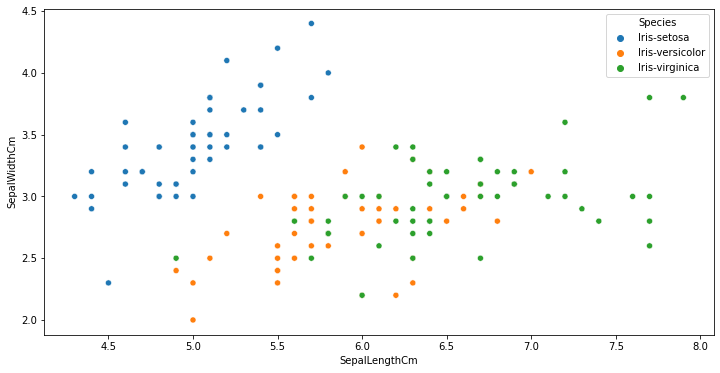

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df)
plt.show()

From the above graph, we can see that
- Iris-setosa has smaller sepal length but higher width
- Iris-versicolor lies in almost middle for sepal length as well as sepal width
- Iris-virginica has larger sepal length and smaller sepal width

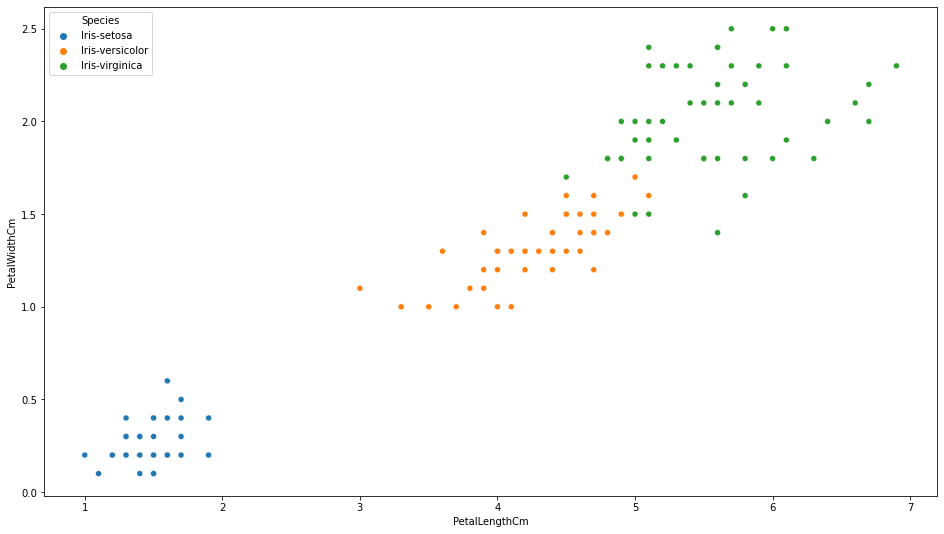

In [43]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )
plt.show()

From the above graph, we can see that
- Iris-setosa has the smallest petal length as well as petal width
- Iris-versicolor has average petal length and petal width
- Iris-virginica has the highest petal length as well as petal width

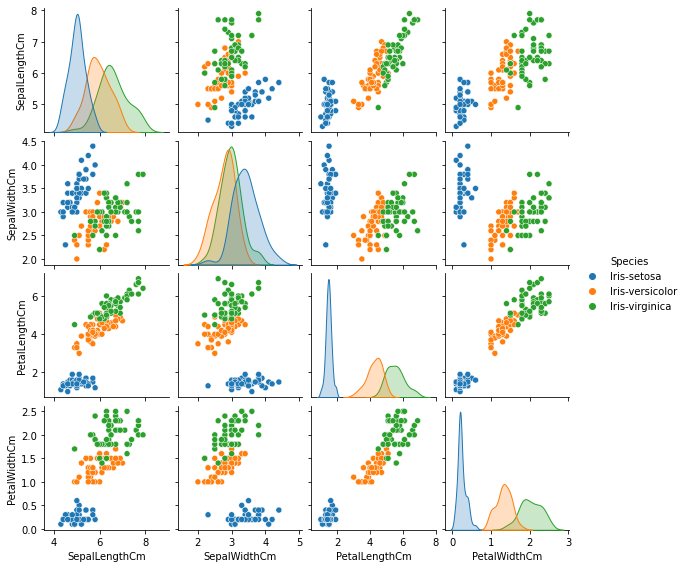

In [44]:
sns.pairplot(df.drop(['Id'], axis = 1), 
             hue='Species', height=2)

From the above plots, we can see that
- Iris-setosa has the smallest of petals width and length. It also has the smallest sepal length but larger sepal widths

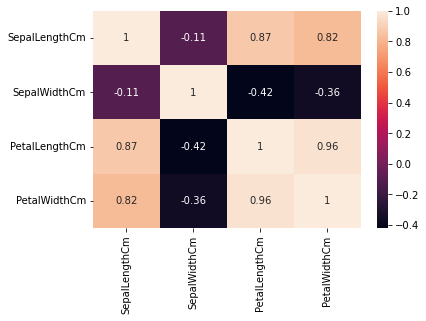

In [45]:
sns.heatmap(df.corr().drop(
  ['Id'], axis=1).drop(['Id'], axis=0),
            annot = True);

From the above graph, we can see that 
- Petal width and petal length features are highly correlated with each other 
- Sepal width and sepal length features are slightly correlated with each other

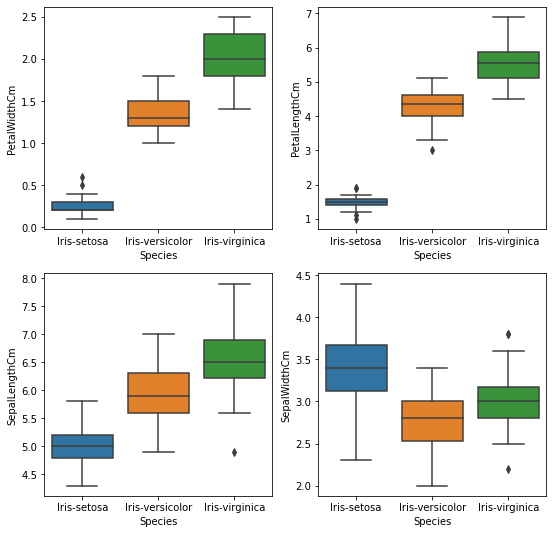

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(9,9))
sns.boxplot( y='PetalWidthCm', x= 'Species', data=df, ax=axes[0, 0])
sns.boxplot( y='PetalLengthCm', x= 'Species', data=df, ax=axes[0, 1])
sns.boxplot( y='SepalLengthCm', x= 'Species', data=df, ax=axes[1, 0])
sns.boxplot( y='SepalWidthCm', x= 'Species', data=df, ax=axes[1, 1])
plt.show()

From the above plots, we can infer that
- Iris-setosa has the smaller feature and less distributed with some outliers
- Iris-versicolor is distributed and has the average feature
- Iris-virginica is highly distributed and has the largest feature

### 2. Split the Data

In [47]:
# make function to encode categorical data to numeric
def enc(a):
    if a == 'Iris-setosa':
        return 1
    elif a == 'Iris-versicolor':
        return 2
    else:
        return 3
    
# add a column "target" to encoding categorical data from species column based on the above function
df['target'] = df.apply(lambda row: enc(row['Species']), axis = 1)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [48]:
X = df.drop(['Species'], axis = 1)
X = X.to_numpy()[:,(1,2,3,4)]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

Train test split is a model validation procedure that reveals how our model performs on new data. In this model, I split the data with 80% of the dataset goes into the training set and 20% of the dataset goes into the testing set.

### 3. Performing Classification

In [49]:
# creating decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

### 4. Visualization

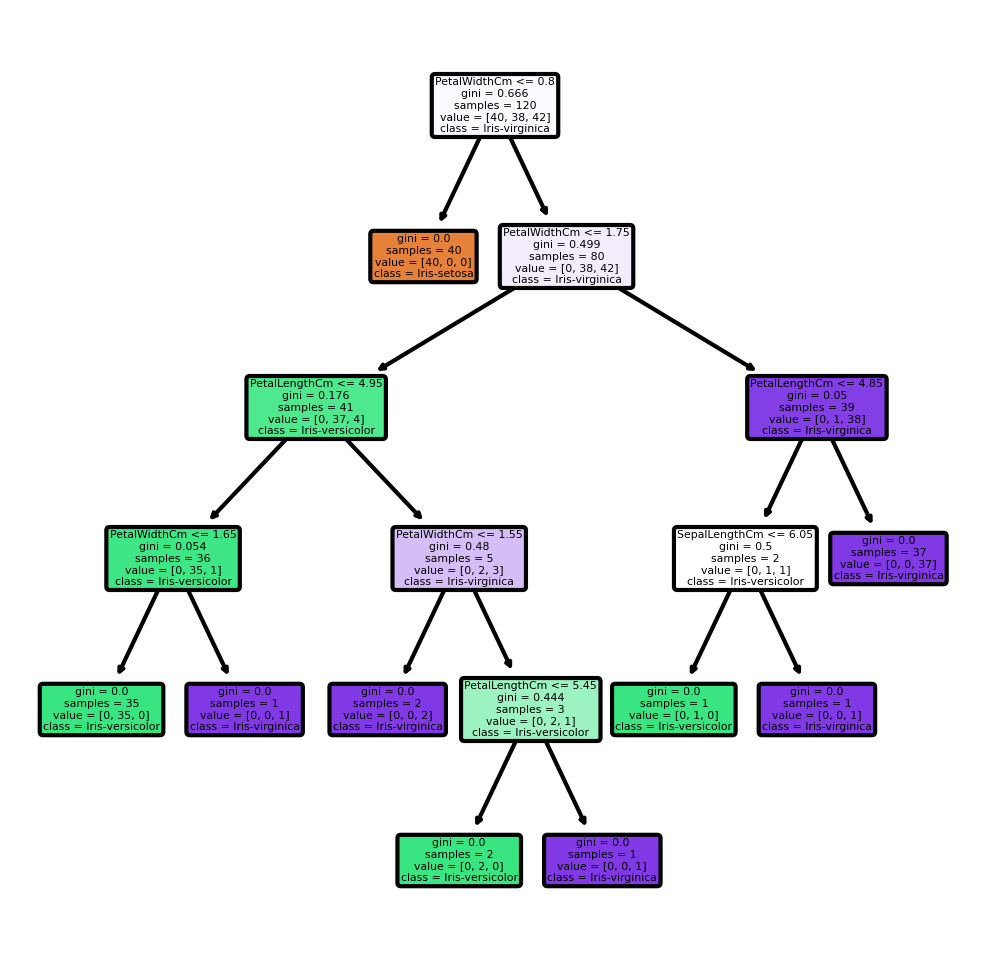

In [50]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True,
              rounded = True);
fig.savefig('dtree.png')

The main idea of a decision tree is to identify the features which contain the most information regarding the target feature and then split the dataset along the values of these features such that the target feature values at the resulting nodes are as pure as possible. A feature that best separates the uncertainty from information about the target feature is said to be the most informative feature. The search process for a most informative feature goes on until we end up with pure leaf nodes.

On the first node,we can analyze that
- Our model seems to have decided that the feature it wants to make a decision on is petal width. It also chose 0.8 as the dividing value
- gini is the impurity of the node. The gini index is calculated by subtracting the sum of the squared probabilities of each class from one
- samples is the amount of training samples that went through this node. In this case, all of them used since it's the first node.

### 5. Testing and Measuring Performance

In [51]:
print(confusion_matrix(y_test, y_pred))

[[3 4 3]
 [4 6 2]
 [2 1 5]]


A confusion matrix is used to describe the performance of a classification model on a set of test data for which the true values are known.

In [52]:
# predict accuracy score
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        12
           3       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



A classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown above.

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. 

### 6. Result

According to a classification report and confusion matrix, we can conclude that:
- 9 of 9 Iris-setosa samples is correctly classified
- 11 of 12 Iris-versicolor samples is correctly classified. 1 sample was incorrectly classified as Iris-virginica
- 9 of 9 Iris-virginica samples is correctly classified
- Accuracy value of 97% means that identification of 3 of every 100 flowers is incorrect, and 97 is correct.